In [1]:
!pip install wordcloud
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00


# 전처리


In [2]:
import pandas as pd
import urllib.request
from datasets import load_dataset

# 영화 리뷰 정보 다운로드하기
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x79f45ef0d450>)

In [3]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [4]:
# 훈련 데이터 확인1

train_data.shape, test_data.shape

((150000, 3), (50000, 3))

In [5]:
# 훈련 데이터 확인2
# 0: 부정, 1:긍정

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
# 테스트 데이터 확인
# 0: 부정, 1:긍정

test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 1. EDA


In [7]:
#1. 데이터의 결측치 확인
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [8]:
test_data.isnull().sum()

id          0
document    3
label       0
dtype: int64

In [9]:
# target 클래스 수 확인하기(이진 분류)

train_data["label"].value_counts()

0    75173
1    74827
Name: label, dtype: int64

[Text(0.5, 1.0, 'Customer Satisfaction(Train)')]

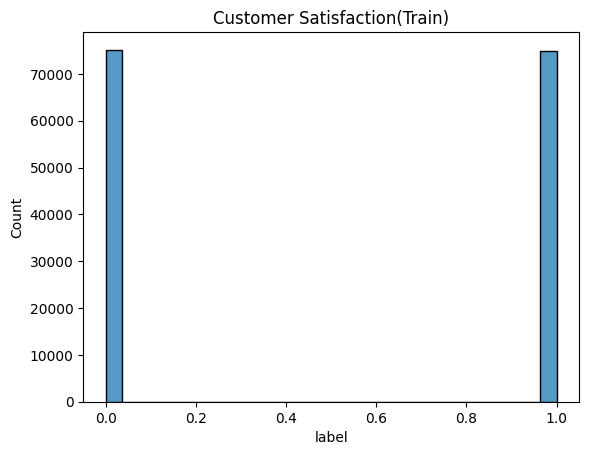

In [10]:
# 클래스 불균형 (class imbalance) 확인(이진 분류)
import seaborn as sns

sns.histplot(train_data["label"]).set(title="Customer Satisfaction(Train)")

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
# %matplotlib inline

# 한글 폰트
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

('AppleGothic.ttf', <http.client.HTTPMessage at 0x79f453725e10>)

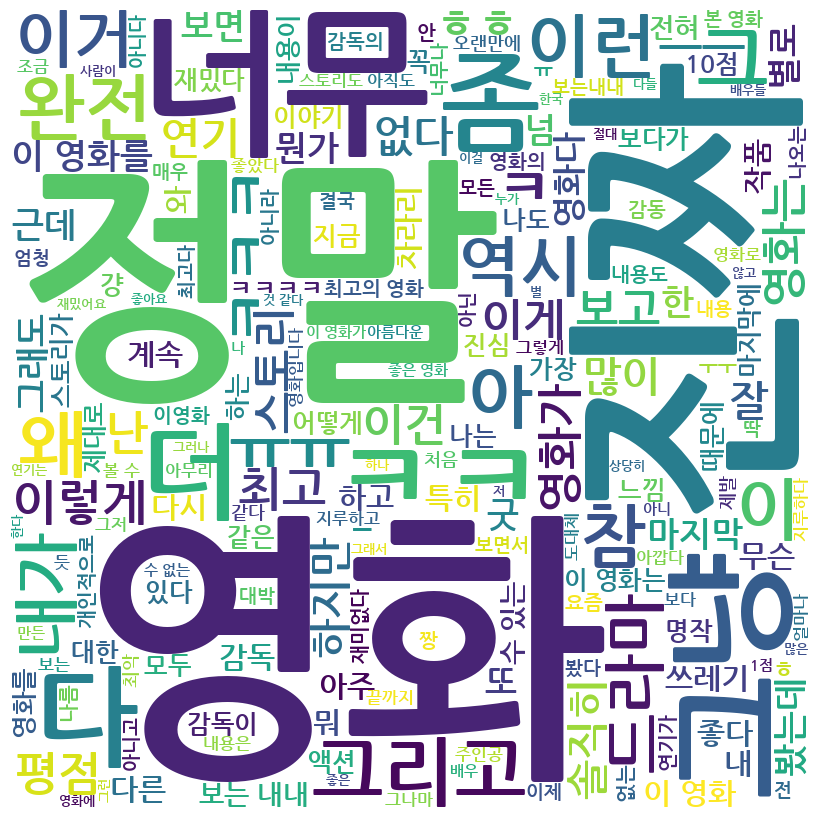

In [12]:
# 1. Stopwords 및 특수문자 필터링

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 2. 문장 데이터를 단어화하기
for val in train_data["document"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800,
                font_path='AppleGothic.ttf',
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [13]:
# 필터링할 추가적인 stopwords 정의

stopwords_2 = ["영화", "진짜", "정말", "이거", "그냥", "너무", "영화가", "영화는",
             "이거", "이게", "이건", "영화의", "어떤", "아주", "계속", "영화다",
             "영화를", "그리고"
]

### 2. 토큰화 및 불용어 제거


In [14]:
# 토큰화된 문장확인
tokenized_text[0]

['아', '더빙..', '진짜', '짜증나네요', '목소리']

In [15]:
len(tokenized_text)

150000

In [16]:
# 새로운 불용어(stopword_2)와 기존 불용어 필터링

def filter_stopwords(tokenized_text, stopwords_2):
  tokenized_filtered = []

  for i in tokenized_text:
    for word in i:
      if word not in stopwords and word not in stopwords_2:
        tokenized_filtered.append(word)

  return tokenized_filtered

In [17]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

In [18]:
tokenized_filtered[0:10]

['아',
 '더빙..',
 '짜증나네요',
 '목소리',
 '흠...포스터보고',
 '초딩영화줄....오버연기조차',
 '가볍지',
 '않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소']

In [19]:
len(tokenized_filtered)

1083270

In [20]:
# 각 단어 카운트

import operator

def word_count(tokenized_data):
  word_counter = {}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] = 1

  # 많이 나온 순서대로 정렬

  sorted_dict = dict( sorted(word_counter.items(),
                           key=operator.itemgetter(1), reverse=True))

  return sorted_dict

In [21]:
tokenized_dict = word_count(tokenized_filtered)

In [22]:
# 가장 상위 20개의 단어
def top_20(tokenized_dict):
  top_20_words = list(tokenized_dict.items())[:20]
  return top_20_words

top_20(tokenized_dict)

[('이', 5059),
 ('영화.', 3598),
 ('왜', 3285),
 ('더', 3260),
 ('이런', 3249),
 ('수', 2945),
 ('잘', 2644),
 ('다', 2615),
 ('보고', 2557),
 ('좀', 2449),
 ('그', 2421),
 ('본', 2298),
 ('최고의', 2219),
 ('ㅋㅋ', 2019),
 ('내가', 2000),
 ('없는', 1957),
 ('이렇게', 1828),
 ('완전', 1780),
 ('평점', 1760),
 ('봤는데', 1746)]

In [23]:
# 불용어 추가1

stopwords_2.extend(["이", "이렇게", "더", "수", "다", "그", "내가", "이렇게",
               "완전", "봤는데", "영화.", "평점", "평점이", "왜", "이런", "본",
               "보고", "잘"
])

In [24]:
# 불용어 추가2

stopwords_2.extend(["보는", "내", "다시", "난", "연기", "한", "것", "하는", "또",
                    "역시", "좀", "참", "많이", "없는", "있는"
])

In [25]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

1015418

In [26]:
tokenized_dict = word_count(tokenized_filtered)

In [27]:
top_20(tokenized_dict)

[('최고의', 2219),
 ('ㅋㅋ', 2019),
 ('좋은', 1726),
 ('재밌게', 1343),
 ('쓰레기', 1295),
 ('아', 1204),
 ('드라마', 1186),
 ('꼭', 1181),
 ('가장', 1178),
 ('보면', 1176),
 ('ㅋㅋㅋ', 1108),
 ('마지막', 1070),
 ('스토리', 1020),
 ('무슨', 999),
 ('ㅋ', 989),
 ('없고', 981),
 ('.', 981),
 ('볼', 959),
 ('ㅠㅠ', 958),
 ('같은', 956)]

### 3. 키워드 분석


In [28]:
# 감정이 드러난 단어 확인

emotion_dict = {"최고의": "극찬", "ㅋㅋ": "웃음", "좋은": "기쁨", "재밌게": "흥미",
                "쓰레기": "혐오", "ㅋㅋㅋ": "웃음", "ㅋ": "무심", "ㅠㅠ": "슬픔"
}

In [29]:
from collections import defaultdict, OrderedDict

emotions_dict = defaultdict(int)

emotions_list = []

for k, v in tokenized_dict.items():
  for key, value in emotion_dict.items():
    if k == key:
      emotions_list.append((value, v))

for k, v in emotions_list:
  if k in emotions_dict:
    emotions_dict[k] += v
  else:
    emotions_dict[k] = v

emotions_dict = OrderedDict(sorted(emotions_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

emotions_dict

OrderedDict([('웃음', 3127),
             ('극찬', 2219),
             ('기쁨', 1726),
             ('흥미', 1343),
             ('혐오', 1295),
             ('무심', 989),
             ('슬픔', 958)])

In [30]:
# Plotly로 시각화

# Pie Chart
import plotly.express as px

emotions = pd.Series(emotions_dict)

fig = px.pie(emotions, values=emotions, names=emotions.index, title="가장 두드러지게 나타난 감정", hover_data=[emotions], labels=emotions.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


In [31]:
fig = px.bar(emotions, x=emotions.index, y=emotions, title="가장 두드러지게 나타난 감정")
fig.show()

# 모델링


In [32]:
# import torch

# from transformers import BertTokenizer
# from transformers import BertForSequenceClassification, AdamW, Adafactor, BertConfig
# from transformers import get_linear_schedule_with_warmup
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# from keras.utils import pad_sequences
# from sklearn.model_selection import train_test_split

# import pandas as pd
# import numpy as np
# import random
# import time
# import datetime

# import os

# n_devices = torch.cuda.device_count()
# print(n_devices)

# for i in range(n_devices):
#     print(torch.cuda.get_device_name(i))

In [33]:
import pandas as pd
import numpy as np
import random
import time
import datetime
from tqdm import tqdm

import csv
import os

import tensorflow as tf
import torch

# BERT 사용
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# for padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 전처리 및 평가 지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, hamming_loss

In [34]:
# 데이터셋 확인

from datasets import load_dataset

train_data.to_csv('train_data.csv', index=False, encoding='utf-8-sig')
test_data.to_csv('test_data.csv', index=False, encoding='utf-8-sig')

train_data = load_dataset(
        "csv",
        data_files={
            "train": "train_data.csv",
        },
    )

test_data = load_dataset(
        "csv",
        data_files={
            "test": "test_data.csv",
        },
    )

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [35]:
# train:validation 8:2로 분리

cs = train_data['train'].train_test_split(0.2)
train_cs = cs["train"]
valid_cs = cs["test"]

test_cs = test_data['test']

In [36]:
# 훈련 데이터, 검증 데이터, 테스트 데이터에 대해서 `[CLS] 문장 [SEP]` 구조 생성

train_sentences = list(map(lambda x: '[CLS] ' + str(x) + ' [SEP]', train_cs['document']))
validation_sentences = list(map(lambda x: '[CLS] ' + str(x) + ' [SEP]', valid_cs['document']))
test_sentences = list(map(lambda x: '[CLS] ' + str(x) + ' [SEP]', test_cs['document']))

In [37]:
train_labels = train_cs['label']
validation_labels = valid_cs['label']
test_labels = test_cs['label']

In [38]:
test_sentences[:5]

['[CLS] 굳 ㅋ [SEP]',
 '[CLS] GDNTOPCLASSINTHECLUB [SEP]',
 '[CLS] 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아 [SEP]',
 '[CLS] 지루하지는 않은데 완전 막장임... 돈주고 보기에는.... [SEP]',
 '[CLS] 3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠?? [SEP]']

## BERT 토크나이저를 이용한 전처리

In [39]:
# 한국어 BERT 중 하나인 'klue/bert-base'를 사용.
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

In [40]:
MAX_LEN = 128

def data_to_tensor (sentences, labels):

  tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
  input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

  # pad_sequences는 패딩을 위한 모듈. 주어진 최대 길이를 위해서 뒤에서 0으로 채움.
  # ex) [231, 52, 45] ==> [231, 52, 45, 0, 0, 0]
  input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

  attention_masks = []

  for seq in input_ids:
      seq_mask = [float(i > 0) for i in seq]
      attention_masks.append(seq_mask)

  tensor_inputs = torch.tensor(input_ids)
  tensor_labels = torch.tensor(labels)
  tensor_masks = torch.tensor(attention_masks)

  return tensor_inputs, tensor_labels, tensor_masks

In [41]:
train_inputs, train_labels, train_masks = data_to_tensor(train_sentences, train_labels)
validation_inputs, validation_labels, validation_masks = data_to_tensor(validation_sentences, validation_labels)
test_inputs, test_labels, test_masks = data_to_tensor(test_sentences, test_labels)

In [42]:
print(train_inputs[0])
print(train_masks[0])

tensor([    2, 18968,  2052,  2079,    11, 19955,  2649, 15581,    11,   749,
         2716,  2062,    18,  4551,  2116,  2154,  6233,  2119, 11610,  2532,
            3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

## 데이터셋 준비

In [43]:
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [44]:
print('훈련 데이터의 크기:', len(train_labels))
print('검증 데이터의 크기:', len(validation_labels))
print('테스트 데이터의 크기:', len(test_labels))

훈련 데이터의 크기: 120000
검증 데이터의 크기: 30000
테스트 데이터의 크기: 50000


In [45]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [46]:
num_labels = 2 # 2:긍정 또는 부정

model = BertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=num_labels)
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [47]:
# 옵티마이저 선택
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [48]:
# 몇 번의 에포크(전체 데이터에 대한 학습 횟수)를 할 것인지 선택
epochs = 2
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [49]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))  # hh:mm:ss

In [50]:
def metrics(predictions, labels):
    y_pred = predictions
    y_true = labels

    # 사용 가능한 메트릭들을 사용한다.
    accuracy = accuracy_score(y_true, y_pred)
    f1_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average='macro', zero_division=0)
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro', zero_division=0)
    f1_weighted_average = f1_score(y_true=y_true, y_pred=y_pred, average='weighted', zero_division=0)

    # 메트릭 결과에 대해서 리턴
    metrics = {'accuracy': accuracy,
               'f1_macro': f1_macro_average,
               'f1_micro': f1_micro_average,
               'f1_weighted': f1_weighted_average}

    return metrics

## 모델 학습

In [51]:
# 랜덤 시드값.
seed_val = 777
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

model.zero_grad()
for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_loss = 0

    model.train()

    for step, batch in tqdm(enumerate(train_dataloader)):
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # gradient clipping if it is over a threshold
        optimizer.step()
        scheduler.step()

        model.zero_grad()

    avg_train_loss = total_loss / len(train_dataloader)

    print("")
    print("  Average training loss: {0:.4f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

======== Epoch 1 / 2 ========


500it [05:09,  1.59it/s]

  Batch   500  of  3,750.    Elapsed: 0:05:10.


1000it [10:23,  1.59it/s]

  Batch 1,000  of  3,750.    Elapsed: 0:10:24.


1500it [15:37,  1.60it/s]

  Batch 1,500  of  3,750.    Elapsed: 0:15:37.


2000it [20:51,  1.59it/s]

  Batch 2,000  of  3,750.    Elapsed: 0:20:51.


2500it [26:04,  1.60it/s]

  Batch 2,500  of  3,750.    Elapsed: 0:26:05.


3000it [31:18,  1.59it/s]

  Batch 3,000  of  3,750.    Elapsed: 0:31:18.


3500it [36:31,  1.59it/s]

  Batch 3,500  of  3,750.    Elapsed: 0:36:32.


3750it [39:08,  1.60it/s]



  Average training loss: 0.2779
  Training epcoh took: 0:39:09
======== Epoch 2 / 2 ========


500it [05:13,  1.59it/s]

  Batch   500  of  3,750.    Elapsed: 0:05:13.


1000it [10:27,  1.59it/s]

  Batch 1,000  of  3,750.    Elapsed: 0:10:27.


1500it [15:40,  1.60it/s]

  Batch 1,500  of  3,750.    Elapsed: 0:15:41.


2000it [20:54,  1.60it/s]

  Batch 2,000  of  3,750.    Elapsed: 0:20:55.


2500it [26:08,  1.60it/s]

  Batch 2,500  of  3,750.    Elapsed: 0:26:09.


3000it [31:22,  1.59it/s]

  Batch 3,000  of  3,750.    Elapsed: 0:31:23.


3500it [36:36,  1.59it/s]

  Batch 3,500  of  3,750.    Elapsed: 0:36:37.


3750it [39:13,  1.59it/s]


  Average training loss: 0.1783
  Training epcoh took: 0:39:14


## 검증 데이터에 대한 평가

In [52]:
t0 = time.time()
model.eval()
accum_logits, accum_label_ids = [], []

for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    for b in logits:
        # 3개의 값 중 가장 큰 값을 예측한 인덱스로 결정
        accum_logits.append(np.argmax(b))

    for b in label_ids:
        accum_label_ids.append(b)

accum_logits = np.array(accum_logits)
accum_label_ids = np.array(accum_label_ids)
results = metrics(accum_logits, accum_label_ids)

print("Accuracy: {0:.4f}".format(results['accuracy']))
print("F1 (Macro) Score: {0:.4f}".format(results['f1_macro']))
print("F1 (Micro) Score: {0:.4f}".format(results['f1_micro']))
print("F1 (Weighted) Score: {0:.4f}".format(results['f1_weighted']))

Accuracy: 0.9042
F1 (Macro) Score: 0.9042
F1 (Micro) Score: 0.9042
F1 (Weighted) Score: 0.9042


## 모델 저장과 로드

In [53]:
%pwd
%mkdir model4
path = '/content/model4/'

In [54]:
# 모델 저장
torch.save(model.state_dict(), path+"BERT_news_positive_negative_model.pt")

In [55]:
# 모델 로드
model.load_state_dict(torch.load(path+"BERT_news_positive_negative_model.pt"))

<All keys matched successfully>

## 테스트 데이터 평가

In [56]:
t0 = time.time()
model.eval()
accum_logits, accum_label_ids = [], []

for step, batch in tqdm(enumerate(test_dataloader)):
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    for b in logits:
        # 3개의 값 중 가장 큰 값을 예측한 인덱스로 결정
        # ex) [ 3.5134246  -0.30875662 -2.111316  ] ==> 0
        accum_logits.append(np.argmax(b))

    for b in label_ids:
        accum_label_ids.append(b)

accum_logits = np.array(accum_logits)
accum_label_ids = np.array(accum_label_ids)
results = metrics(accum_logits, accum_label_ids)

print("Accuracy: {0:.4f}".format(results['accuracy']))
print("F1 (Macro) Score: {0:.4f}".format(results['f1_macro']))
print("F1 (Micro) Score: {0:.4f}".format(results['f1_micro']))
print("F1 (Weighted) Score: {0:.4f}".format(results['f1_weighted']))

100it [00:21,  4.51it/s]

  Batch   100  of  1,563.    Elapsed: 0:00:22.


200it [00:44,  4.50it/s]

  Batch   200  of  1,563.    Elapsed: 0:00:44.


300it [01:06,  4.58it/s]

  Batch   300  of  1,563.    Elapsed: 0:01:06.


400it [01:27,  4.60it/s]

  Batch   400  of  1,563.    Elapsed: 0:01:28.


500it [01:49,  4.59it/s]

  Batch   500  of  1,563.    Elapsed: 0:01:50.


600it [02:11,  4.56it/s]

  Batch   600  of  1,563.    Elapsed: 0:02:12.


700it [02:33,  4.59it/s]

  Batch   700  of  1,563.    Elapsed: 0:02:34.


800it [02:55,  4.56it/s]

  Batch   800  of  1,563.    Elapsed: 0:02:55.


900it [03:17,  4.51it/s]

  Batch   900  of  1,563.    Elapsed: 0:03:17.


1000it [03:39,  4.56it/s]

  Batch 1,000  of  1,563.    Elapsed: 0:03:39.


1100it [04:01,  4.61it/s]

  Batch 1,100  of  1,563.    Elapsed: 0:04:01.


1200it [04:23,  4.60it/s]

  Batch 1,200  of  1,563.    Elapsed: 0:04:23.


1300it [04:44,  4.60it/s]

  Batch 1,300  of  1,563.    Elapsed: 0:04:45.


1400it [05:06,  4.54it/s]

  Batch 1,400  of  1,563.    Elapsed: 0:05:07.


1500it [05:28,  4.55it/s]

  Batch 1,500  of  1,563.    Elapsed: 0:05:29.


1563it [05:42,  4.57it/s]

Accuracy: 0.9034
F1 (Macro) Score: 0.9034
F1 (Micro) Score: 0.9034
F1 (Weighted) Score: 0.9034


## 예측

In [57]:
from transformers import pipeline

pipe = pipeline("text-classification", model=model.cuda(), tokenizer=tokenizer, device=0, max_length=512,
                return_all_scores=True, function_to_apply='softmax')

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



In [58]:
pipe = pipeline("text-classification", model=model.cuda(), tokenizer=tokenizer, device=0, max_length=512, function_to_apply='softmax')

In [63]:
label_dict = {'LABEL_0' : '부정', 'LABEL_1' : '긍정'}

In [65]:
def prediction(text):
  result = pipe(text)

  return [label_dict[result[0]['label']]]

In [68]:
prediction('그냥 쏘쏘 했음')

['부정']

In [69]:
prediction('그냥 볼 만 했어')

['긍정']

In [70]:
prediction('존잼')

['긍정']

In [72]:
prediction('돈 아까움')

['부정']